In [1]:
import numpy as np
import matplotlib.pyplot as plt

# for numerical inegration
import scipy.integrate

import seaborn as sns
sns.set()

Let's consider our model for auto-regulation again.

$$\frac{dX}{dt} = \frac{\beta}{1+\frac{X^n}{K^n}} - \alpha X \tag{1} $$

As a reminder, $dX/dt$ defines a slope, or an expected amount of change in the variable $X$. So if we are interested in determining how $X$ will change over *time*, we can use the expected slope as a way to predict where $X$ will be in the future time point $t + \Delta t$. Concretely in mathematical terms, this looks like:

$$X(t+\Delta t) = X(t) + \left( \frac{\beta}{1+\frac{X(t)^n}{K^n}} - \alpha X(t) \right) \Delta t \tag{2} $$

In [2]:
Beta = 10 # per min 
alpha = 1 # per transcript per min
K = 5 # per cell 
n = 2

Below I explore the role that changing $\Delta t$ has. 

Text(0, 0.5, 'copy number of X per cell')

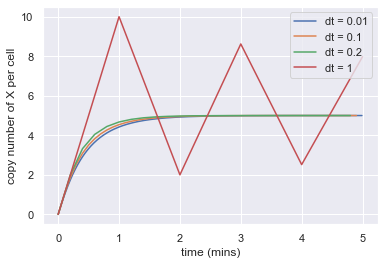

In [3]:
X = np.zeros(500)
dt = 0.01 # min

for t in range(len(X)-1):
    dX = Beta / (1 + X[t]**n/K**n) - alpha * X[t]
    X[t+1] = X[t] + dX*dt
    
t = np.arange(len(X))*dt   
plt.plot(t, X)


X = np.zeros(50)
dt = 0.1 # min

for t in range(len(X)-1):
    dX = Beta / (1 + X[t]**n/K**n) - alpha * X[t]
    X[t+1] = X[t] + dX*dt
    
t = np.arange(len(X))*dt   
plt.plot(t, X)


X = np.zeros(25)
dt = 0.2 # min

for t in range(len(X)-1):
    dX = Beta / (1 + X[t]**n/K**n) - alpha * X[t]
    X[t+1] = X[t] + dX*dt
    
t = np.arange(len(X))*dt   
plt.plot(t, X)


X = np.zeros(6)
dt = 1 # min

for t in range(len(X)-1):
    dX = Beta / (1 + X[t]**n/K**n) - alpha * X[t]
    X[t+1] = X[t] + dX*dt
    
t = np.arange(len(X))*dt   
plt.plot(t, X)

plt.legend(["dt = 0.01","dt = 0.1", "dt = 0.2", "dt = 1"])
plt.xlabel("time (mins)")
plt.ylabel("copy number of X per cell")

## Scipy integration version:

First we define a function for the right-hand side (RHS) of our differential equation:

In [15]:
def auto_regulation_rhs(x, t, Beta, K, alpha):
    """ Right hand side for autoregualtion """
    
    # Compute dx/dt
    dx_dt = Beta / (1 + x**n/K**n) - alpha * x

    # Return the result as a NumPy array
    return np.array(dx_dt)

Next we specify all the pieces we’ll need for the actual integration:

- The time points we want to integrate over
- The initial condition of our system
- The values of any of our parameters

We can then call our `scipy.integrat.odeint` fucntion which takes the following input in turn:

- The function that specifies our RHS equations, `auto_regulation_rhs` in this case
- Our array of the initial conditions, x_0
- The array of time values, t
- And args, a tuple containing all of our parameters

In [16]:
# Time points we want for the solution
t = np.linspace(0,5,1000)

# Initial conditions
x_0 = np.array([0])

# Package parameters into a tuple
args = (Beta, K, alpha)

# Integrate ODES
x = scipy.integrate.odeint(auto_regulation_rhs, x_0, t, args=args)

Lastly, let's plot the results:

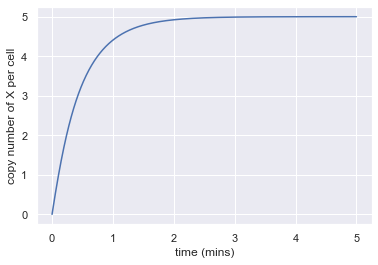

In [17]:
plt.plot(t, x)
plt.xlabel("time (mins)")
plt.ylabel("copy number of X per cell");

## Autoregulation vs. simple regulation 

Remember that simple regulation was described as:

$$\frac{dX}{dt} = \beta - \alpha X \tag{3}$$

Below, use `scipy` to integrate Equation (3). Plot both results (autoregulation vs. simple regulation) on the same graph. Can you validate what was seen from Figure 2.6 in Alon? As a tip, you will want to change the value of $\beta$ so that the two models have the same steady state and will be more directly comparable.

In [18]:
def simple_reg_rhs(x, t, beta, alpha):
    """ Right hand side for autoregualtion """
    
    # Compute dx/dt
    dx_dt = beta - alpha*x

    # Return the result as a NumPy array
    return np.array(dx_dt)

In [24]:
beta = 5
alpha = 1

In [25]:
# Time points we want for the solution
t1 = np.linspace(0,5,1000)

# Initial conditions
x_1 = np.array([0])

# Package parameters into a tuple
args = (beta, alpha)

# Integrate ODES
x1 = scipy.integrate.odeint(simple_reg_rhs, x_1, t1, args=args)

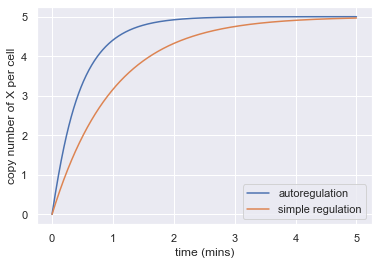

In [26]:
plt.plot(t, x)
plt.plot(t1,x1)
plt.xlabel("time (mins)")
plt.ylabel("copy number of X per cell");
plt.legend(['autoregulation', 'simple regulation'])

## Modeling a C1-FFL

### (a)

First specify the values of X over time, with a short pulse and a long pulse built in, like that in Figure 3.11 in Alon. Plot your resulting array to make sure that you've encoded this information correctly. 

Text(0, 0.5, 'X concentration')

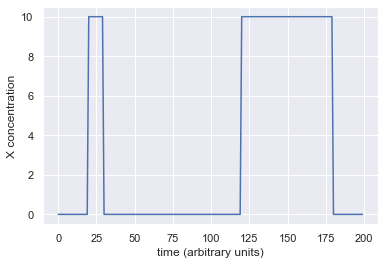

In [7]:
X = np.zeros(200)
X[20:30] = 10
X[120:180] = 10
plt.plot(X)
plt.xlabel("time (arbitrary units)")
plt.ylabel("X concentration")

### (b)

Specify the two differential equations of the C1-FFL below. The production of $Y$ should be modeled as an activating Hill function that depends on $X$. The production of $Z$ should be modeled as an activating Hill function that depends on $X$ **times** and activating Hill function that depends on $Y$. Be able to explain why this acts as the desired "AND" gate.

$$\frac{dY}{dt} = \beta_Y \frac{X^n}{K_{XY}^n + X^n} - \alpha_Y Y $$

Below, explain what each parameter is:

- $\beta_Y$:
- $K_{XY}$:
- $\alpha_Y$:

$$\frac{dZ}{dt} = \beta_Z \frac{X^n}{K_{XZ}^n + X^n} \frac{Y^n}{K_{YZ}^n + Y^n} - \alpha_Z Z $$

Below, explain what each parameter is:

- $\beta_Z$:
- $K_{XZ}$:
- $K_{YZ}$:
- $\alpha_Z$:

### (c)

Use Euler to integrate both $Y$ and $Z$ over time. Keep in mind that their behavior will depend on the values of the $X$ array you set up in part (a)! As a challenge, you can also try to integrate this with `scipy`, although this is a bit trickier since there is not only a time array, but also the array of $X$ values upon which $Y$ and $Z$ depend. 